# **Imports**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras import layers


import itertools
from itertools import cycle

import itertools
from itertools import cycle

sns.set_style('whitegrid')
# Set the style to whitegrid
plt.style.use('seaborn-whitegrid')
plt.style.library['seaborn-whitegrid']
plt.style.use("seaborn-v0_8-whitegrid")

from matplotlib import rcParams
rcParams['font.weight'] = 'bold'

2024-03-23 11:07:20.183985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 11:07:20.184107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 11:07:20.306287: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_63/1129899978.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_6

## Reading Data

In [2]:
# Load data 
data = pd.read_csv('/kaggle/input/milkquality/milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [6]:
# Low (Bad)  , Medium (Moderate) , High (Good)
data=data.replace({'low': 0 , 'medium': 1 , 'high': 2})

/tmp/ipykernel_63/3898033099.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({'low': 0 , 'medium': 1 , 'high': 2})


<Axes: >

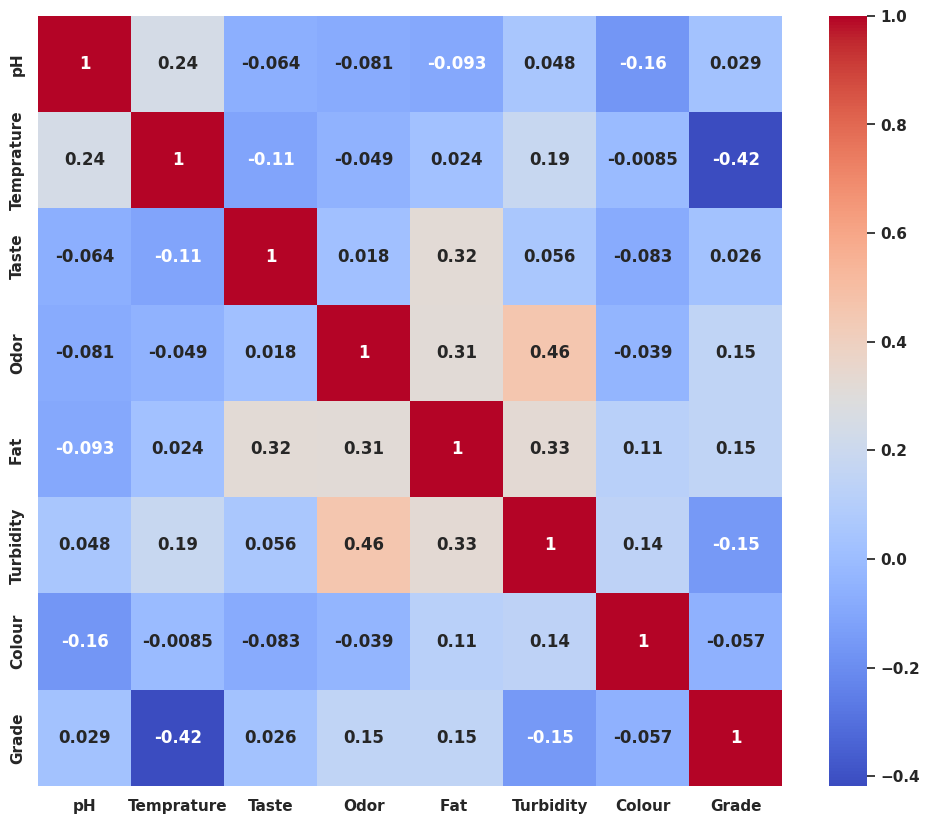

In [7]:
# plotting correlation heatmap
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

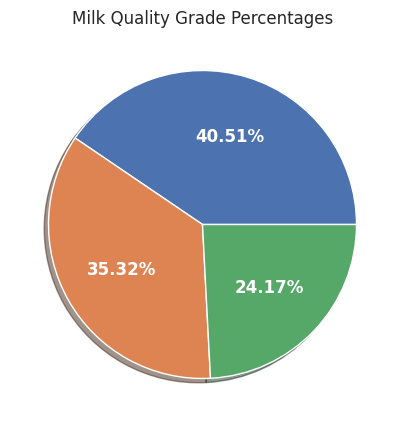

In [8]:
counts = data['Grade'].value_counts()
grade_percentages = [(count/len(data))*100 for count in counts]
grade_label = counts.index.tolist()

plt.figure(figsize=(5,5))
plt.title('Milk Quality Grade Percentages')
plt.pie(grade_percentages, labels=grade_label, autopct='%1.2f%%',shadow=True , textprops={'color': 'white'});

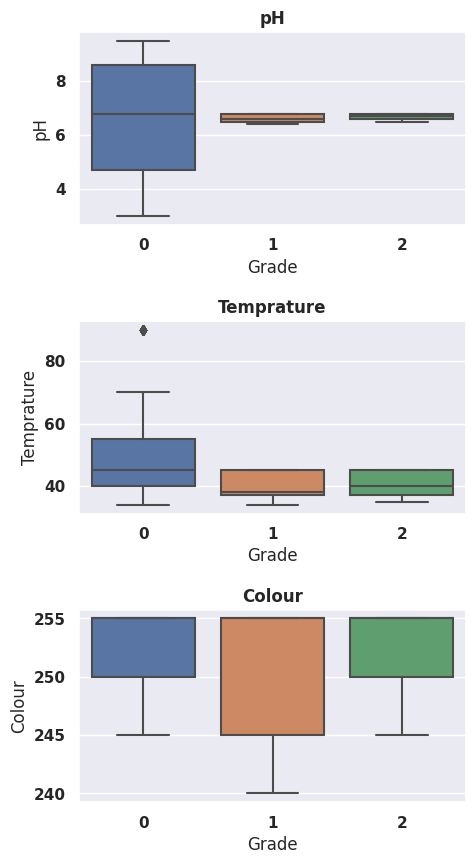

In [9]:
col_list=['pH', 'Temprature', 'Colour']

fig = plt.figure(figsize=(5,10))
# Adjusting the margins
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_list)):
    plt.subplot(3,1,i+1)
    plt.title(col_list[i] , weight = 'bold')
    sns.boxplot(data=data,y=data[col_list[i]],x=data['Grade'])

sns.set_style('whitegrid')


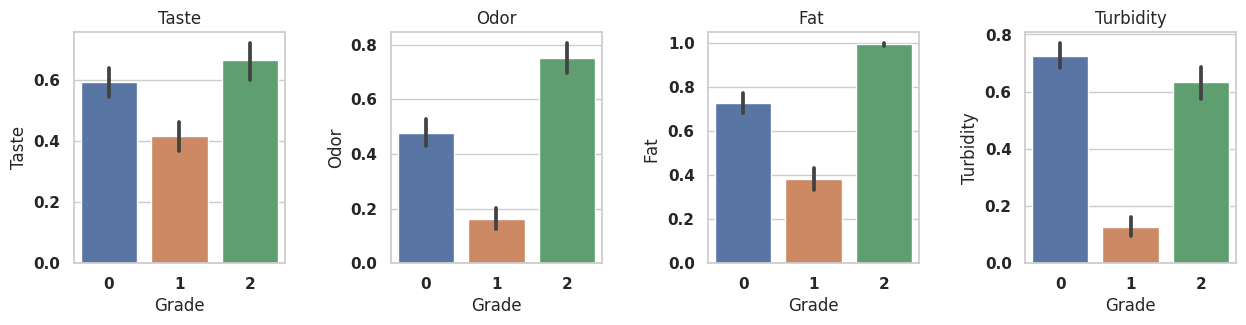

In [10]:
col_list=['Taste', 'Odor', 'Fat ','Turbidity']

fig = plt.figure(figsize=(15,3))
# Adjusting the margins
plt.subplots_adjust(wspace=0.5)

for i in range(len(col_list)):
    plt.subplot(1,4,i+1)
    plt.title(col_list[i])
    sns.barplot(data=data,y=data[col_list[i]],x=data['Grade'])

sns.set_style('whitegrid')


In [11]:
X = data.drop('Grade' , axis = 1)
y = data['Grade']


In [12]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the data
X, y = smote.fit_resample(X, y)

In [14]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the feature data
X = scaler.fit_transform(X)

In [16]:
X=np.array(X)
y=np.array(y)


In [23]:
# splitting the dataset 80% for training , 10% testing and 10% validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42 , stratify=y)

In [24]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)


X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)



# **ML Models**

# **SVM**

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import time

# Train and evaluate a support vector machine classifier
svm = SVC(kernel='linear')

start_time = time.time()
svm.fit(X_train, y_train)
training_time = time.time() - start_time

# Get number of parameters
num_parameters = svm.support_vectors_.shape[0] * X_train.shape[1]

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy_svm * 100))
print('------------------------------------------------------------------')
print(classification_report(y_test, y_pred_svm))

print("-------------------------------------------------------------------")
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)

print("-------------------------------------------------------------------")
print("Training Time For SVM :", training_time, "seconds")
print("Number of Parameters For SVM:", num_parameters)

print("-------------------------------------------------------------------")
# Compute the AUC

# Get predicted probabilities for each class
y_pred_svm_prob = svm.decision_function(X_test)

# Binarize the true labels if multi-class
y_test_bin = label_binarize(y_test, classes=svm.classes_)

# Compute ROC AUC score
auc = roc_auc_score(y_test_bin, y_pred_svm_prob, average='macro')
print("AUC For SVM:", auc)


Accuracy of SVM classifier: 86.82%
------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        86
         1.0       0.94      0.79      0.86        86
         2.0       0.83      0.93      0.88        86

    accuracy                           0.87       258
   macro avg       0.87      0.87      0.87       258
weighted avg       0.87      0.87      0.87       258

-------------------------------------------------------------------
Confusion Matrix:
[[76  2  8]
 [10 68  8]
 [ 4  2 80]]
-------------------------------------------------------------------
Training Time For SVM : 0.02002692222595215 seconds
Number of Parameters For SVM: 2450
-------------------------------------------------------------------
AUC For SVM: 0.9338606453939066


# **Random Forest**

In [65]:
from sklearn.ensemble import RandomForestClassifier
import time

# Train and evaluate a Random Forest classifier
rf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=3, random_state=33)

start_time = time.time()
rf.fit(X_train, y_train)
training_time_rf = time.time() - start_time

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier: {:.2f}%".format(accuracy_rf * 100))
print('------------------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))

print("-------------------------------------------------------------------")
# Print the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

print("-------------------------------------------------------------------")
print("Training Time for Random Forest:", training_time_rf, "seconds")
print("Number of Parameters for Random Forest:", sum(tree.tree_.node_count for tree in rf.estimators_))

print("-------------------------------------------------------------------")
# Compute the AUC 
# Get predicted probabilities for each class
y_pred_rf_prob = rf.predict_proba(X_test)

# Binarize the true labels for multi-class
y_test_bin = label_binarize(y_test, classes=rf.classes_)

# Compute ROC AUC score
auc_rf = roc_auc_score(y_test_bin, y_pred_rf_prob, average='macro')
print("AUC For Random Forest:", auc_rf)



Accuracy of Random Forest classifier: 91.47%
------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        86
         1.0       0.81      0.98      0.88        86
         2.0       0.97      0.81      0.89        86

    accuracy                           0.91       258
   macro avg       0.93      0.91      0.92       258
weighted avg       0.93      0.91      0.92       258

-------------------------------------------------------------------
Confusion Matrix:
[[82  4  0]
 [ 0 84  2]
 [ 0 16 70]]
-------------------------------------------------------------------
Training Time for Random Forest: 0.19864344596862793 seconds
Number of Parameters for Random Forest: 1062
-------------------------------------------------------------------
AUC For Random Forest: 0.9962141698215251
